# import 

In [17]:
%run functions.ipynb
from scipy.stats import mannwhitneyu
from scipy.signal import detrend
from numpy.lib.stride_tricks import sliding_window_view


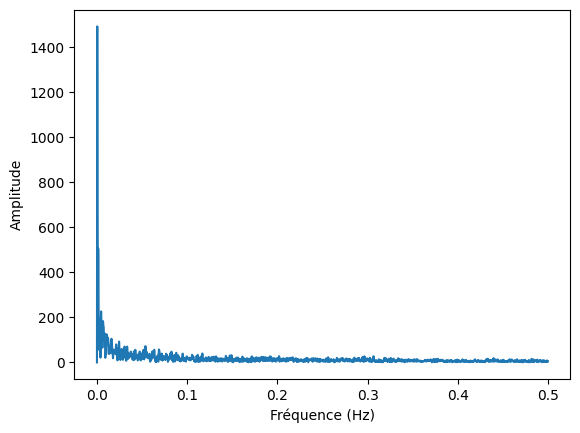

In [18]:


df_basic_stats = basic_stats_patient("AA00","reponder")



def compute_fft(signal, fs):
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), d=1/fs)
    magnitude = np.abs(fft_vals)
    return freqs, magnitude

event_markers_secods,time_values,flux_values = get_time_and_flux_values("AA00")
signal = flux_values
signal_centered = signal - np.mean(signal)
signal_detrended = detrend(signal_centered)
signal_norm = signal_detrended / np.std(signal_detrended)

freqs, mag = compute_fft(signal_norm, 1)
plt.plot(freqs, mag)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.show()




In [19]:
# affichage du signal brut 

displaywithspetialtimes("AA00")

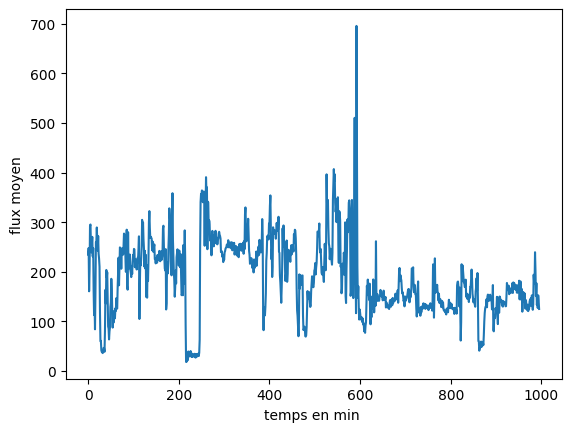

In [20]:
#flux_clean = flux_values[ x for x in flux_values if x is not None and not math.isnan(x)]  # flux sans valleur null
# je supprime les valeurs point ou le flux est null correspondant au pauses lors du remplissage 
flux_values = np.asarray(flux_values, dtype=float)
flux_clean = flux_values[flux_values != 0 ]
t = np.arange(len(flux_clean))
plt.plot(t, flux_clean)
plt.xlabel("temps en min ")
plt.ylabel("flux moyen")
plt.show()

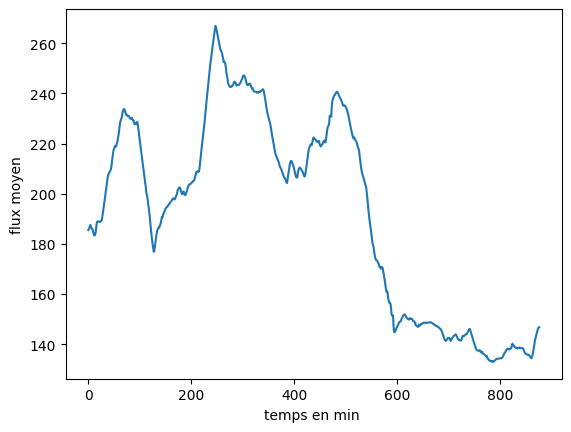

In [21]:
flux_values = flux_clean
m = 120
flux_values = np.asarray(flux_values, dtype=float)

segments = sliding_window_view(flux_values, m)
flux_means = np.mean(segments, axis=1)

t = np.arange(len(flux_means))

plt.plot(t, flux_means)
plt.xlabel("temps en min ")
plt.ylabel("flux moyen")
plt.show()

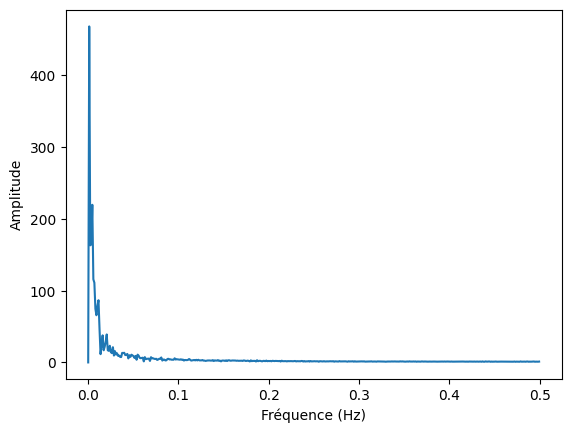

In [22]:
signal = flux_means
signal_centered = signal - np.mean(signal)
signal_detrended = detrend(signal_centered)
signal_norm = signal_detrended / np.std(signal_detrended)

freqs, mag = compute_fft(signal_norm, 1)
plt.plot(freqs, mag)
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.show()